In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
%matplotlib inline

db = client['facebook']
friends_table = db['friends']
rmfriends_table = db['removed_friends']
post_com_table = db['posts_and_comments']
search_hist_table = db['your_search_history']
profile_table = db['profile_information']
location_table = db['location_history']
login_loc_table = db['where_you_login_from']
profile_update_table = db['profile_update_history']
login_out_table = db['logins_and_logouts']

db.list_collection_names()

['removed_friends',
 'comments',
 'posts_and_comments',
 'sent_friend_requests',
 'news_topics_for_recommendations',
 'notes',
 'your_search_history',
 'unfollowed_pages',
 'likes_on_external_sites',
 'location_history',
 'used_ip_addresses',
 'facebook_watch_topics_for_recommendations',
 'profile_information',
 'people',
 'menu_items',
 'account_activity',
 'where_you_login_from',
 'rejected_friend_requests',
 'friends',
 'last_location',
 'recieved_friend_requests',
 'profile_update_history',
 'news_feed_topics_for_recommendations',
 'logins_and_logouts',
 'primary_location',
 'followers',
 'pages',
 'following']

In [209]:
print("Facebook has recorded {} people I'm friends with.".format(str(len(friends_table.find_one()['friends']))))

Facebook has recorded 836 people I'm friends with.


In [210]:
print(location_table.find_one()['location_history'])
print("Facebook has {} location points on me.".format(str(len(location_table.find_one()['location_history']))))

[{'name': 'San Francisco', 'coordinate': {'latitude': 37.75698, 'longitude': -122.42097}, 'creation_timestamp': 1569600790}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.75703, 'longitude': -122.42094}, 'creation_timestamp': 1569587385}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.7571, 'longitude': -122.42098}, 'creation_timestamp': 1569559743}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.75712, 'longitude': -122.42099}, 'creation_timestamp': 1569535934}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.75713, 'longitude': -122.42098}, 'creation_timestamp': 1569452781}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.75712, 'longitude': -122.42096}, 'creation_timestamp': 1569387078}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.75714, 'longitude': -122.42098}, 'creation_timestamp': 1569372964}, {'name': 'San Francisco', 'coordinate': {'latitude': 37.75709, 'longitude': -122.42097}, 'creation_timestamp': 1569329332}, {'name':

Facebook has 14512 location points on me.


In [211]:
#print(login_loc_table.find_one())
print("Facebook has recorded me logging in from {} locations".format(str(len(login_loc_table.find_one()['active_sessions']))))

Facebook has recorded me logging in from 14 locations


In [212]:
#print(search_hist_table.find_one()['searches'])
print("Facebook has recorded {} of my searches.".format(str(len(search_hist_table.find_one()['searches']))))

Facebook has recorded 891 of my searches.


In [213]:
len(login_out_table.find_one()['account_accesses'])
print("Facebook has tracked my logins from {} different locations.".format(str(len(login_out_table.find_one()['account_accesses']))))

Facebook has tracked my logins from 13 different locations.


In [214]:
# Digging into the location data
location_df = pd.DataFrame(location_table.find_one()['location_history'])

In [215]:
location_df.head()

,coordinate,creation_timestamp,name
0,"{'latitude': 37.75698, 'longitude': -122.42097}",1569600790,San Francisco
1,"{'latitude': 37.75703, 'longitude': -122.42094}",1569587385,San Francisco
2,"{'latitude': 37.7571, 'longitude': -122.42098}",1569559743,San Francisco
3,"{'latitude': 37.75712, 'longitude': -122.42099}",1569535934,San Francisco
4,"{'latitude': 37.75713, 'longitude': -122.42098}",1569452781,San Francisco


In [220]:
#getting the data into a useable format
# location_df['lat'] = location_df['coordinate']['latitude']
# location_df['lng'] = location_df['coordinate']['longitude']
coordinates_list = list(location_df['coordinate'])
print(coordinates_list[:5])
lat_list, lng_list = ([] , [])
for itm in coordinates_list:
    lat_list.append(itm['latitude'])
    lng_list.append(itm['longitude'])
lat_series = pd.Series(lat_list)
lng_series = pd.Series(lng_list)
#location_df['lat'].append(lat_series, ignore_index=True)
#location_df['lng'].append(lng_series, ignore_index=True)

location_df['ts'] = pd.to_datetime(location_df['creation_timestamp'], unit='s')

#print(location_df['lat'].count())
#print(location_df['lat'].unique(), location_df['lng'].unique())
location_df.head()
location_df.tail()

[{'latitude': 37.75698, 'longitude': -122.42097}, {'latitude': 37.75703, 'longitude': -122.42094}, {'latitude': 37.7571, 'longitude': -122.42098}, {'latitude': 37.75712, 'longitude': -122.42099}, {'latitude': 37.75713, 'longitude': -122.42098}]


,coordinate,creation_timestamp,name,ts
14507,"{'latitude': 37.72295, 'longitude': -122.44703}",1401130279,San Francisco,2014-05-26 18:51:19
14508,"{'latitude': 37.73317, 'longitude': -122.43378}",1401130162,San Francisco,2014-05-26 18:49:22
14509,"{'latitude': 37.77974, 'longitude': -122.41416}",1401129137,San Francisco,2014-05-26 18:32:17
14510,"{'latitude': 37.7842, 'longitude': -122.41584}",1401124787,San Francisco,2014-05-26 17:19:47
14511,"{'latitude': 37.76567, 'longitude': -122.40763}",1401044393,San Francisco,2014-05-25 18:59:53


2015-09-28    401
2015-10-06    225
2015-09-21    209
2015-09-22    199
2014-06-18    143
Name: ts, dtype: int64


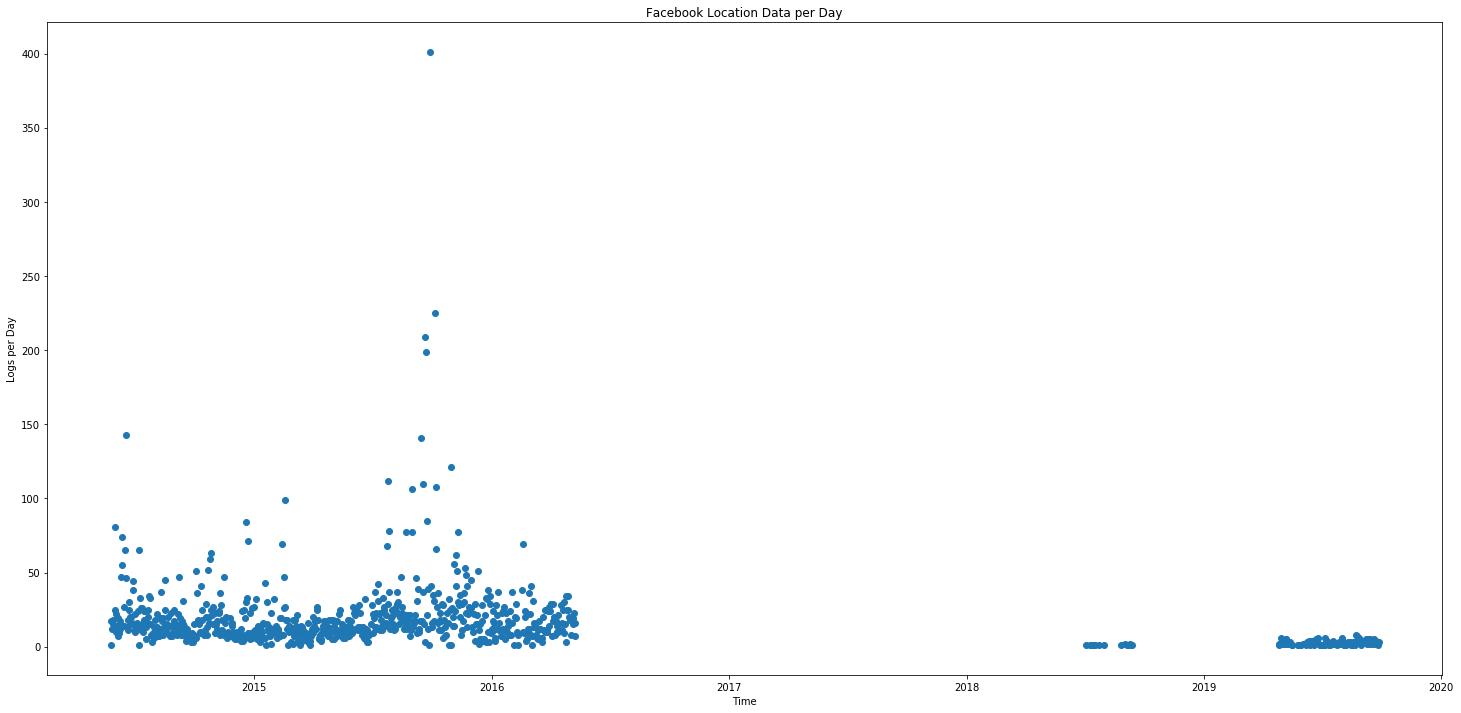

In [234]:
# Plotting location logs per day over time 
from datetime import datetime
fig, ax = plt.subplots(figsize=(25,12))

time2 = location_df['ts'].dt.floor('D')
time3 = time2.value_counts()
print(time3[:5])

a=list(time3.index.to_pydatetime())
b=list(time3)
lst=[(a[i],b[i]) for i in range(len(b))]
lst.sort()
x=[i[0] for i in lst]
y=[i[1] for i in lst]

#plt.ylim(top=40)
plt.title('Facebook Location Data per Day')
plt.xlabel('Time')
plt.ylabel('Logs per Day')
ax.plot(x,y, 'o')
plt.savefig('location_tracking_over_time3.png')

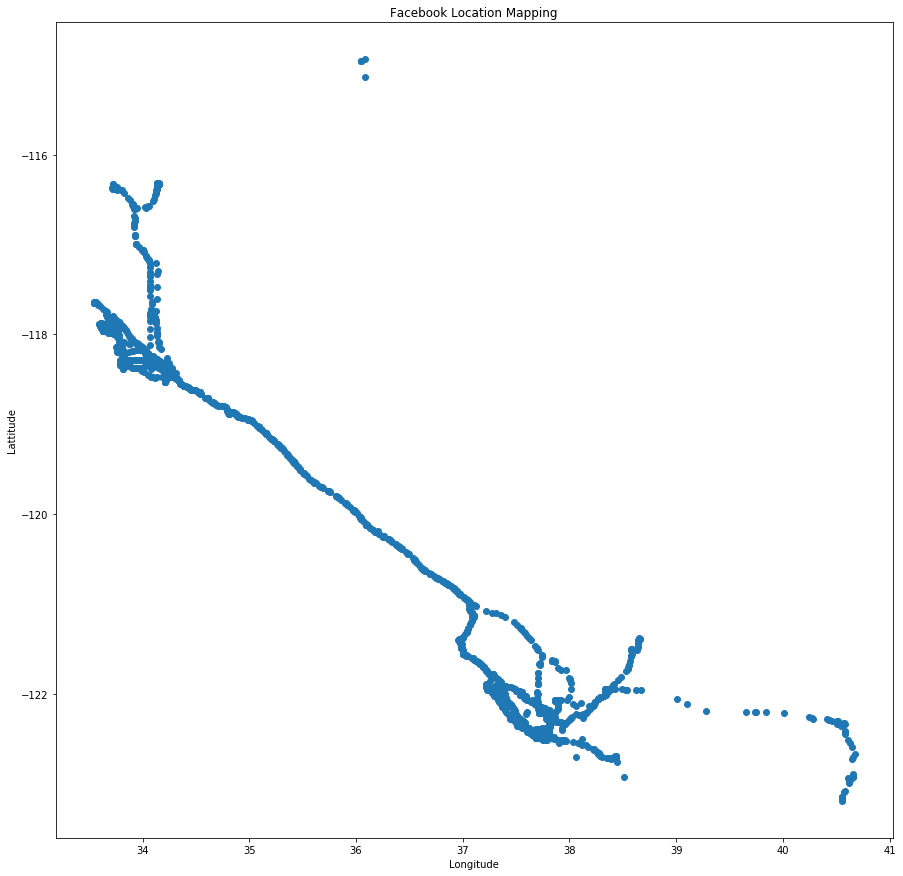

In [243]:
fig, ax = plt.subplots(figsize=(15,15))

plt.title('Facebook Location Mapping')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
ax.plot(lat_list,lng_list, 'o')
plt.savefig('raw_location_plot2.png')